In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from google.colab import files
uploaded = files.upload()

Saving delivery_time.csv to delivery_time.csv


In [3]:
data =pd.read_csv("delivery_time.csv")

EDA

In [4]:
data

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [5]:
data.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [7]:
data.shape

(21, 2)

In [8]:
data.dtypes

Delivery Time    float64
Sorting Time       int64
dtype: object

In [9]:
data.isnull().sum()

Delivery Time    0
Sorting Time     0
dtype: int64

In [10]:
data = data.rename({'Sorting Time':'Sort'},axis =1)
data = data.rename({'Delivery Time':'Delivery'},axis=1)

In [11]:
data=data[['Sort','Delivery']]

In [12]:
data.head()

,Sort,Delivery
0,10,21.00
1,4,13.50
2,6,19.75
3,9,24.00
4,10,29.00


In [13]:
data[data.duplicated()]

,Sort,Delivery


In [14]:
data.describe()

,Sort,Delivery
count,21.000000,21.000000
mean,6.190476,16.790952
std,2.542028,5.074901
min,2.000000,8.000000
25%,4.000000,13.500000
50%,6.000000,17.830000
75%,8.000000,19.750000
max,10.000000,29.000000


Visualisation

<Axes: >

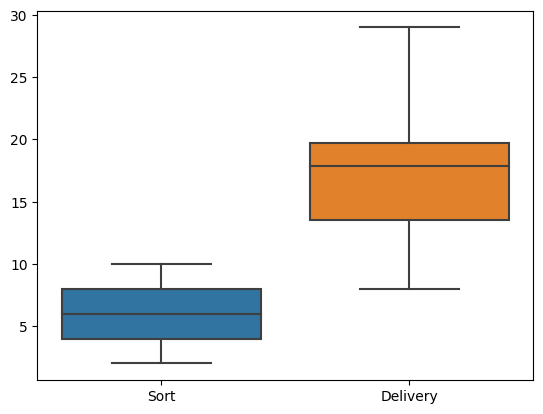

In [ ]:
sns.boxplot(data)

<Axes: xlabel='Sort', ylabel='Count'>

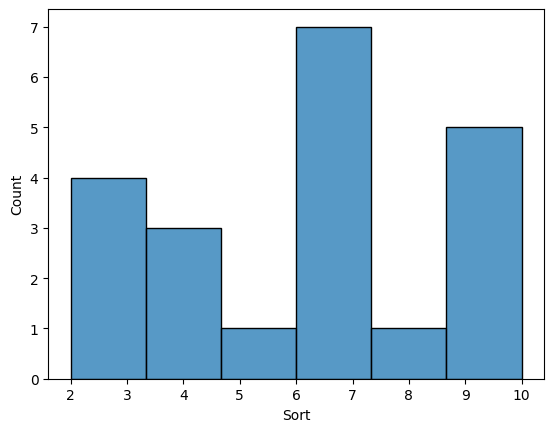

In [19]:
sns.histplot(data["Sort"])

<Axes: xlabel='Delivery', ylabel='Count'>

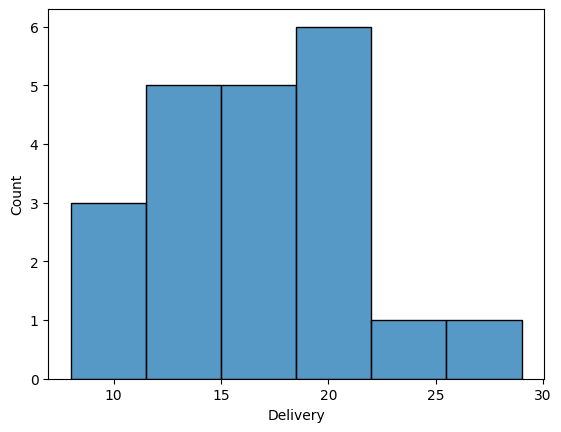

In [20]:
sns.histplot(data["Delivery"])

<Axes: xlabel='Sort', ylabel='Delivery'>

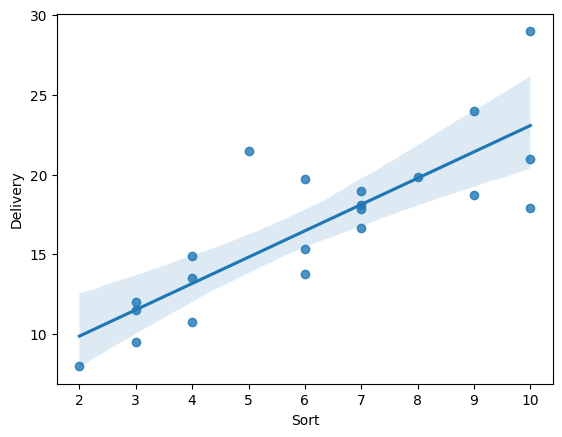

In [ ]:
sns.regplot(data,x='Sort',y='Delivery')

Correlation

In [ ]:
data.corr()

,Sort,Delivery
Sort,1.000000,0.825997
Delivery,0.825997,1.000000


In [ ]:
import statsmodels.formula.api as smf
model = smf.ols('Delivery~Sort',data).fit()

In [ ]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Delivery   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Wed, 19 Apr 2023   Prob (F-statistic):           3.98e-06
Time:                        09:05:26   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.5827      1.722      3.823      0.001       2.979      10.186
Sort           1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Prediction For New Delivery Time

In [ ]:
new_data = pd.Series([5,11,15])
new_data

0     5
1    11
2    15
dtype: int64

In [ ]:
data_pred = pd.DataFrame(new_data,columns=['Sort'])

In [ ]:
model.predict(data)

0     23.072933
1     13.178814
2     16.476853
3     21.423913
4     23.072933
5     16.476853
6     18.125873
7     11.529794
8     23.072933
9     21.423913
10    19.774893
11    13.178814
12    18.125873
13    11.529794
14    11.529794
15    13.178814
16    16.476853
17    18.125873
18     9.880774
19    18.125873
20    14.827833
dtype: float64

In [ ]:
data_pred['Delivery']=model.predict(data_pred)
data_pred

,Sort,Delivery
0,5,14.827833
1,11,24.721953
2,15,31.318032


<Axes: xlabel='Sort', ylabel='Delivery'>

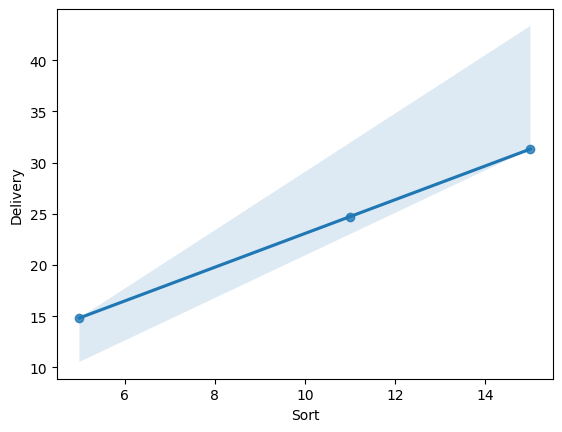

In [ ]:
sns.regplot(data=data_pred,x='Sort',y='Delivery')

Building the Model By Transformation

1.Normalization

In [ ]:
df = data
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
df_scale = pd.DataFrame(mms.fit_transform(df))
x=df_scale.iloc[:,-1]
y=df_scale.iloc[:,0]

In [ ]:
model = smf.ols('y~x',data=df_scale).fit()

In [ ]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Wed, 19 Apr 2023   Prob (F-statistic):           3.98e-06
Time:                        09:13:34   Log-Likelihood:                 6.8295
No. Observations:                  21   AIC:                            -9.659
Df Residuals:                      19   BIC:                            -7.570
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0692      0.082      0.847      0.408      -0.102       0.240
x              1.0861      0.170      6.387      0.000       0.730       1.442
==============================================================================
Omnibus:                        1.409   Durbin-Watson:                   1.346
Prob(Omnibus):                  0.494   Jarque-Bera (JB):                0.371
Skew:                           0.255   Prob(JB):                        0.831
Kurtosis:                       3.405   Cond. No.                         5.02
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

2.Standarizaton

In [ ]:
df_new = data
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
df_new_scale = pd.DataFrame(ss.fit_transform(df_new))

In [ ]:
x=df_scale.iloc[:,-1]
y=df_scale.iloc[:,0]

In [ ]:
model = smf.ols('y~x',data=df_scale).fit()

In [ ]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Wed, 19 Apr 2023   Prob (F-statistic):           3.98e-06
Time:                        09:17:09   Log-Likelihood:                 6.8295
No. Observations:                  21   AIC:                            -9.659
Df Residuals:                      19   BIC:                            -7.570
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0692      0.082      0.847      0.408      -0.102       0.240
x              1.0861      0.170      6.387      0.000       0.730       1.442
==============================================================================
Omnibus:                        1.409   Durbin-Watson:                   1.346
Prob(Omnibus):                  0.494   Jarque-Bera (JB):                0.371
Skew:                           0.255   Prob(JB):                        0.831
Kurtosis:                       3.405   Cond. No.                         5.02
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

3.Log Transformation

In [21]:
new_sorttime = np.log(data["Sort"])
new_sorttime.head()

0    2.302585
1    1.386294
2    1.791759
3    2.197225
4    2.302585
Name: Sort, dtype: float64

<Axes: xlabel='Sort', ylabel='Density'>

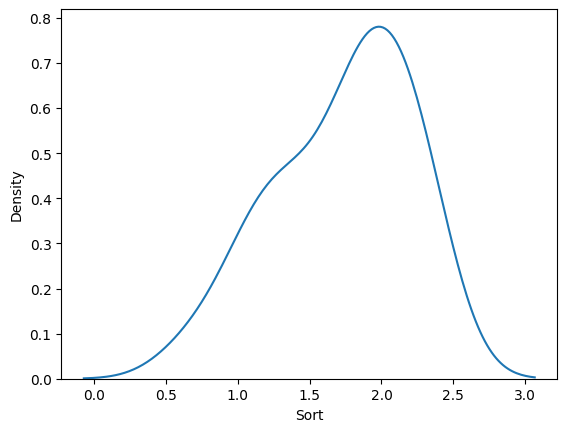

In [22]:
sns.kdeplot(new_sorttime)

In [ ]:
df_scale = np.log(df_new)
x=df_new_scale.iloc[:,-1]
y=df_new_scale.iloc[:,0]

In [ ]:
model = smf.ols('y~x',data=df_new_scale).fit()

In [ ]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Wed, 19 Apr 2023   Prob (F-statistic):           3.98e-06
Time:                        09:20:15   Log-Likelihood:                -17.759
No. Observations:                  21   AIC:                             39.52
Df Residuals:                      19   BIC:                             41.61
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -9.384e-17      0.129  -7.26e-16      1.000      -0.271       0.271
x              0.8260      0.129      6.387      0.000       0.555       1.097
==============================================================================
Omnibus:                        1.409   Durbin-Watson:                   1.346
Prob(Omnibus):                  0.494   Jarque-Bera (JB):                0.371
Skew:                           0.255   Prob(JB):                        0.831
Kurtosis:                       3.405   Cond. No.                         1.00
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

4.Squareroot Transformation

In [23]:
new_sorttime = np.sqrt(data["Sort"])
new_sorttime.head()

0    3.162278
1    2.000000
2    2.449490
3    3.000000
4    3.162278
Name: Sort, dtype: float64

<Axes: xlabel='Sort', ylabel='Density'>

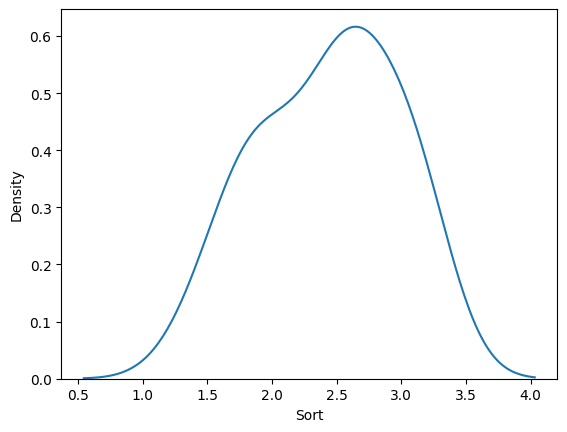

In [24]:
sns.kdeplot(new_sorttime)

In [ ]:
df_new_scale = np.sqrt(df_new)
x=df_new_scale.iloc[:,-1]
y=df_new_scale.iloc[:,0]

In [ ]:
model = smf.ols('y~x',data = df_new_scale).fit()

In [ ]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.729
Model:                            OLS   Adj. R-squared:                  0.715
Method:                 Least Squares   F-statistic:                     51.16
Date:                Wed, 19 Apr 2023   Prob (F-statistic):           8.48e-07
Time:                        09:23:23   Log-Likelihood:                -2.3695
No. Observations:                  21   AIC:                             8.739
Df Residuals:                      19   BIC:                             10.83
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.5151      0.417     -1.236      0.232      -1.388       0.357
x              0.7276      0.102      7.153      0.000       0.515       0.940
==============================================================================
Omnibus:                        0.396   Durbin-Watson:                   1.353
Prob(Omnibus):                  0.820   Jarque-Bera (JB):                0.001
Skew:                          -0.005   Prob(JB):                         1.00
Kurtosis:                       3.029   Cond. No.                         29.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Power Transformation

In [25]:
new_sorttime = (data["Sort"]**2)
new_sorttime.head()

0    100
1     16
2     36
3     81
4    100
Name: Sort, dtype: int64

<Axes: xlabel='Sort', ylabel='Density'>

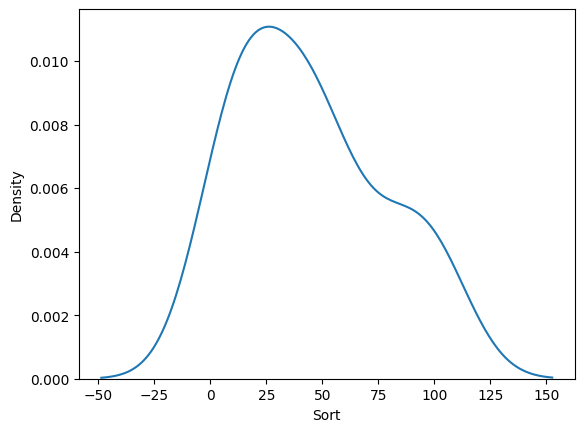

In [26]:
sns.kdeplot(new_sorttime)

Exponential Transformation

In [27]:
new_sorttime = np.exp(data["Sort"])
new_sorttime.head()

0    22026.465795
1       54.598150
2      403.428793
3     8103.083928
4    22026.465795
Name: Sort, dtype: float64

<Axes: xlabel='Sort', ylabel='Density'>

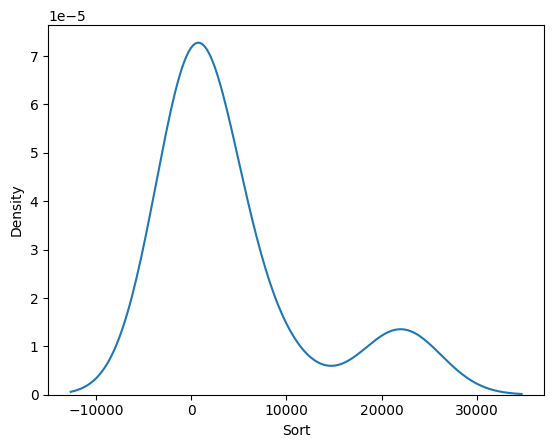

In [28]:
sns.kdeplot(new_sorttime)